In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
sns.set()

In [142]:
df = pd.read_excel('./data_set/coinmarketcap_bitcoin_data_2017.xlsx')

# ethereum data
#df = pd.read_excel('./data_set/coinmarketcap_ethereum_data_2017.xlsx')

In [143]:
df.head()

,date,open,high,low,close,volume,marketcap
0,2019-12-31,7294.44,7335.29,7169.78,7193.60,21167946112,130446112598
1,2019-12-30,7420.27,7454.82,7276.31,7293.00,22874131672,132235128152
2,2019-12-29,7317.65,7513.95,7279.87,7422.65,22445257702,134570835775
3,2019-12-28,7289.03,7399.04,7286.91,7317.99,21365673026,132659059740
4,2019-12-27,7238.14,7363.53,7189.93,7290.09,22777360996,132139502950


In [144]:
df = df.sort_index(ascending=0)

In [145]:
df.head()

,date,open,high,low,close,volume,marketcap
729,2018-01-01,14112.2,14112.2,13154.7,13657.2,10291200000,229119155396
728,2018-01-02,13625.0,15444.6,13163.6,14982.1,16846600192,251377913955
727,2018-01-03,14978.2,15572.8,14844.5,15201.0,16871900160,255080562912
726,2018-01-04,15270.7,15739.7,14522.2,15599.2,21783199744,261795321110
725,2018-01-05,15477.2,17705.2,15202.8,17429.5,23840899072,292544135538


In [146]:
number_simulation = 100
predict_day = 30

close = df['close'].tolist()
returns = pd.DataFrame(close).pct_change()
last_price = close[-1]
results = pd.DataFrame()
avg_daily_ret = returns.mean()
variance = returns.var()
daily_vol = returns.std()
daily_drift = avg_daily_ret - (variance / 2)
drift = daily_drift - 0.5 * daily_vol ** 2

results = pd.DataFrame()

for i in tqdm(range(number_simulation)):
    prices = []
    prices.append(df.close.iloc[-1])
    for d in range(predict_day):
        shock = [drift + daily_vol * np.random.normal()]
        shock = np.mean(shock)
        price = prices[-1] * np.exp(shock)
        prices.append(price)
    results[i] = prices

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 78.03it/s]


In [147]:
results.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,7193.600000,7193.600000,7193.600000,7193.600000,7193.600000,7193.600000,7193.600000,7193.600000,7193.600000,7193.600000,...,7193.600000,7193.600000,7193.600000,7193.600000,7193.600000,7193.600000,7193.600000,7193.600000,7193.600000,7193.600000
1,7356.723476,7001.173521,7466.832261,7278.248635,7231.280461,7624.244426,7531.398718,7354.770121,7317.976474,7217.672819,...,6653.559856,7037.521422,7491.170623,7296.578688,7193.867094,7265.576000,7138.231874,7198.962953,7207.661151,7233.151449
2,7197.457808,7031.963335,7824.810881,7485.828362,6992.684155,7324.690955,7635.823244,7842.448491,7502.695703,6898.753217,...,6847.971845,6916.645263,7445.844378,7215.147101,7221.018201,7154.810821,7269.264483,7583.092535,7160.529475,7115.017176
3,6852.443742,6834.771132,7365.575268,7173.989714,7120.458279,7238.775068,8111.568110,7641.505772,7429.896154,7518.284693,...,6795.892709,7009.435895,7517.193478,6992.184045,7163.672498,7457.337687,7343.847688,7972.350709,7417.931154,7341.081220
4,7022.440412,6649.698907,7148.019068,7107.846468,6698.307359,7186.750421,7417.770901,8031.645270,7802.616254,7638.311366,...,6624.761027,7241.149375,7684.596354,7051.145457,6637.605481,7996.233986,7217.808089,7832.812373,7572.303033,7656.067168


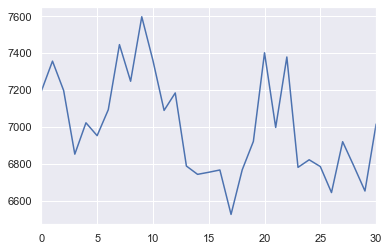

In [148]:
results[0].plot()

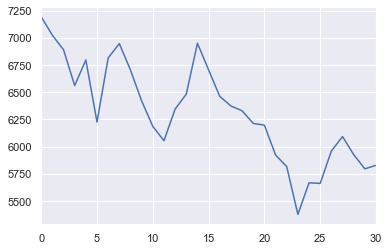

In [149]:
results[29].plot()

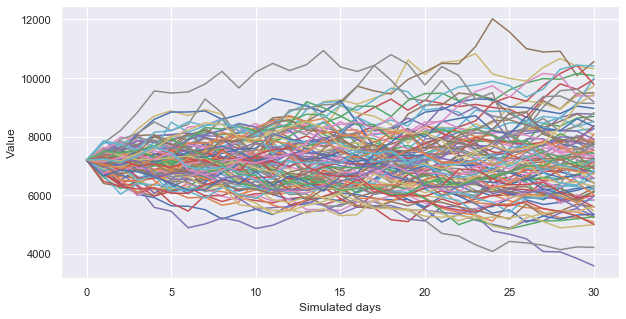

In [150]:
plt.figure(figsize=(10,5))
plt.plot(results)
plt.ylabel('Value')
plt.xlabel('Simulated days')
plt.show()

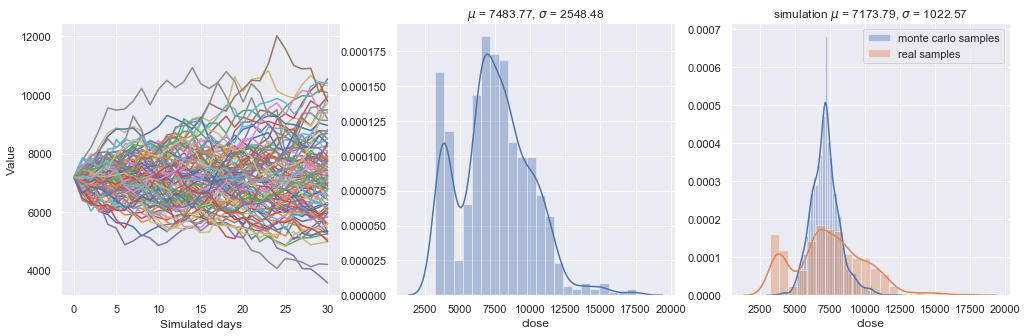

In [151]:
raveled = results.values.ravel()
raveled.sort()
cp_raveled = raveled.copy()

plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
plt.plot(results)
plt.ylabel('Value')
plt.xlabel('Simulated days')
plt.subplot(1,3,2)
sns.distplot(df.close,norm_hist=True)
plt.title('$\mu$ = %.2f, $\sigma$ = %.2f'%(df.close.mean(),df.close.std()))
plt.subplot(1,3,3)
sns.distplot(raveled,norm_hist=True,label='monte carlo samples')
sns.distplot(df.close,norm_hist=True,label='real samples')
plt.title('simulation $\mu$ = %.2f, $\sigma$ = %.2f'%(raveled.mean(),raveled.std()))
plt.legend()
plt.show()

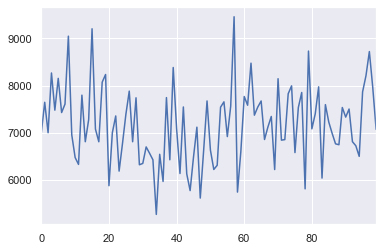

In [152]:
results.mean(axis=0).plot()

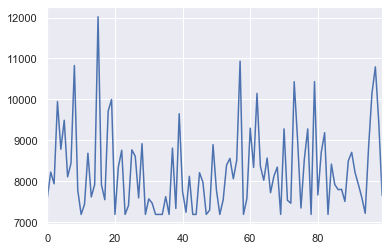

In [153]:
results.max(axis=0).plot()

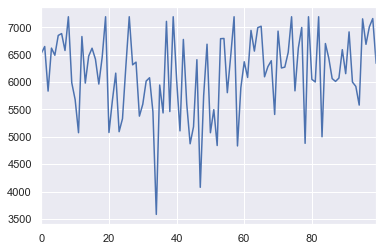

In [154]:
results.min(axis=0).plot()

In [155]:
min_max = {}

In [156]:
min_max["max"] = results.max(axis=0)
min_max["min"] = results.min(axis=0)

In [166]:
final_results = pd.DataFrame([min_max["max"], min_max["min"]], index=["max", "min"])
final_results

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
max,7597.284187,8227.133205,7941.689244,9948.689583,8784.685919,9491.864891,8111.568110,8441.889671,10829.380928,7784.850047,...,8709.408610,8213.505270,7918.404319,7603.030651,7221.018201,8840.968137,10154.148998,10795.278201,9451.558441,7656.067168
min,6525.787110,6649.698907,5834.774286,6620.330993,6489.804019,6852.205715,6885.941071,6576.506400,7193.600000,5986.702925,...,6153.693747,6916.645263,6000.122461,5920.346430,5579.186038,7154.810821,6689.556639,7008.916235,7160.529475,6341.795374


In [167]:
final_results = final_results.transpose()

In [168]:
final_results.head()

,max,min
0,7597.284187,6525.787110
1,8227.133205,6649.698907
2,7941.689244,5834.774286
3,9948.689583,6620.330993
4,8784.685919,6489.804019


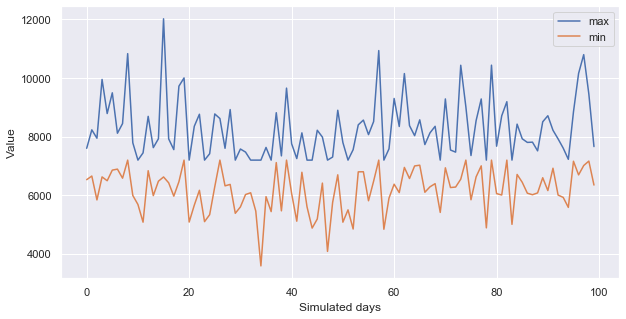

In [169]:
plt.figure(figsize=(10,5))
plt.plot(final_results)
plt.ylabel('Value')
plt.xlabel('Simulated days')
plt.legend(final_result)
plt.show()